<a href="https://colab.research.google.com/github/Asif1310/3014/blob/main/Austin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required modules

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset

In [34]:
df = pd.read_csv("/content/austin_bikeshare_trips.csv") 

# Preliminary exploration

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              648508 non-null  float64
 1   checkout_time       649231 non-null  object 
 2   duration_minutes    649231 non-null  int64  
 3   end_station_id      629389 non-null  float64
 4   end_station_name    649231 non-null  object 
 5   month               618479 non-null  float64
 6   start_station_id    630190 non-null  float64
 7   start_station_name  649231 non-null  object 
 8   start_time          649231 non-null  object 
 9   subscriber_type     647154 non-null  object 
 10  trip_id             649231 non-null  int64  
 11  year                618479 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 59.4+ MB


# What's the deal with the missing values?

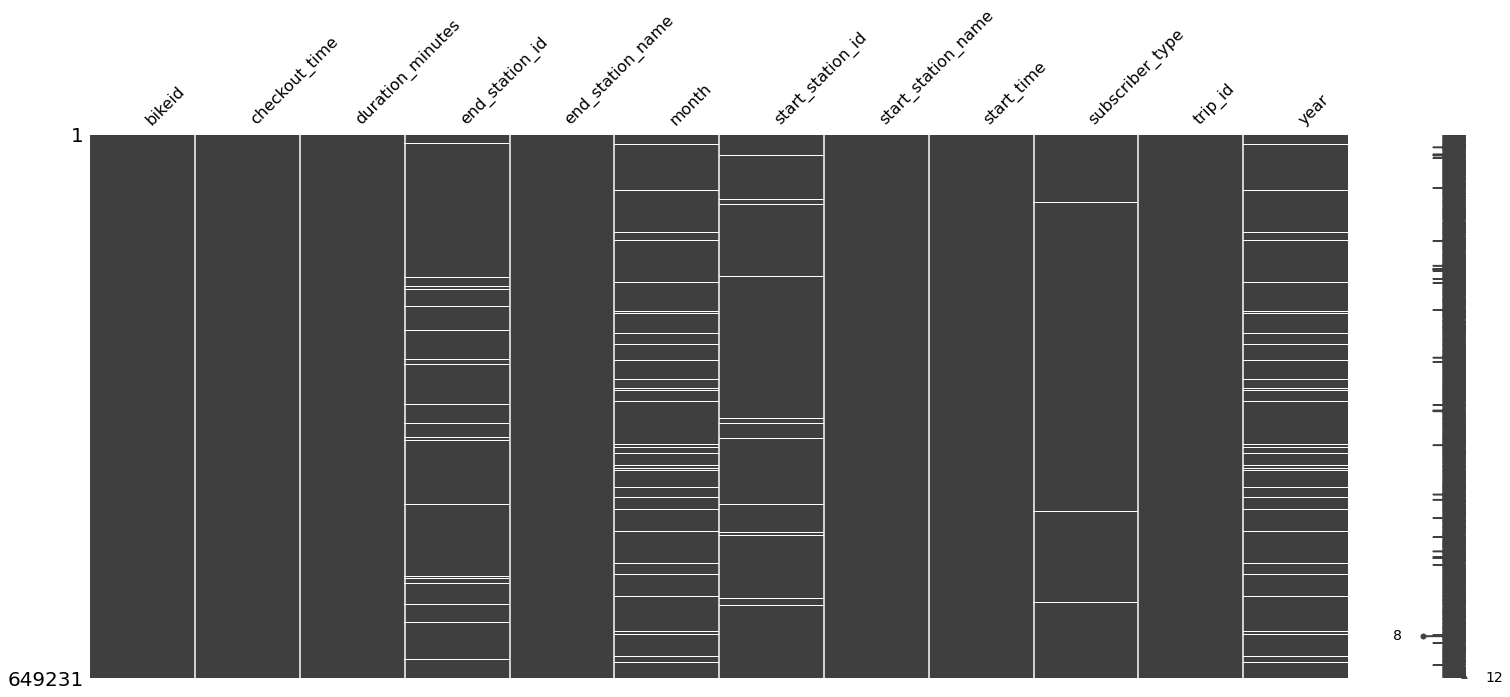

In [36]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

In [37]:
df.isna().sum()

bikeid                  723
checkout_time             0
duration_minutes          0
end_station_id        19842
end_station_name          0
month                 30752
start_station_id      19041
start_station_name        0
start_time                0
subscriber_type        2077
trip_id                   0
year                  30752
dtype: int64

# Drop the columns

For most part, missing values seem random indicating data collection errors. Let us drop all the rows with missing values in the columns other than month and year

In [38]:
df1 = df.dropna(subset = ["start_time","end_station_id","start_station_id","subscriber_type"])

In [39]:
df1.isna().sum()

bikeid                  672
checkout_time             0
duration_minutes          0
end_station_id            0
end_station_name          0
month                 30726
start_station_id          0
start_station_name        0
start_time                0
subscriber_type           0
trip_id                   0
year                  30726
dtype: int64

# Month and year

Let us extract month and year from the start_time column

In [40]:
df1['start_time'] = pd.to_datetime(df1['start_time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613023 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   bikeid              612351 non-null  float64       
 1   checkout_time       613023 non-null  object        
 2   duration_minutes    613023 non-null  int64         
 3   end_station_id      613023 non-null  float64       
 4   end_station_name    613023 non-null  object        
 5   month               582297 non-null  float64       
 6   start_station_id    613023 non-null  float64       
 7   start_station_name  613023 non-null  object        
 8   start_time          613023 non-null  datetime64[ns]
 9   subscriber_type     613023 non-null  object        
 10  trip_id             613023 non-null  int64         
 11  year                582297 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 60.8+ MB


In [42]:
df1.drop(["month", "year"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
df1["month"] = df1["start_time"].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df1["year"] = df1["start_time"].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613023 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   bikeid              612351 non-null  float64       
 1   checkout_time       613023 non-null  object        
 2   duration_minutes    613023 non-null  int64         
 3   end_station_id      613023 non-null  float64       
 4   end_station_name    613023 non-null  object        
 5   start_station_id    613023 non-null  float64       
 6   start_station_name  613023 non-null  object        
 7   start_time          613023 non-null  datetime64[ns]
 8   subscriber_type     613023 non-null  object        
 9   trip_id             613023 non-null  int64         
 10  month               613023 non-null  int64         
 11  year                613023 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 60.8+ MB


# Subscribers during each year

In [46]:
df1["year"].unique()

array([2015, 2016, 2014, 2017, 2013])

In [47]:
df2 = df1[df1["year"] == 2013]["subscriber_type"].value_counts().to_frame().reset_index()
df2["subscriber_type"] = (df2["subscriber_type"]/(df2["subscriber_type"].sum()))*100
df3 = df2.loc[0:2,:]
df3.loc[3, "subscriber_type"] = df2.loc[3:,:]["subscriber_type"].sum()
df3.loc[3, "index"] = "other"
df3_2013 = df3.round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Subscriber proportions in 2013

In [48]:
df3_2013 

,index,subscriber_type
0,24-Hour Kiosk (Austin B-cycle),88.95
1,Annual Membership (Austin B-cycle),4.94
2,Founding Member (Austin B-cycle),3.29
3,rest,2.81


In [17]:
df2 = df1[df1["year"] == 2014]["subscriber_type"].value_counts().to_frame().reset_index()
df2["subscriber_type"] = (df2["subscriber_type"]/(df2["subscriber_type"].sum()))*100
df3 = df2.loc[0:2,:]
df3.loc[3, "subscriber_type"] = df2.loc[3:,:]["subscriber_type"].sum()
df3.loc[3, "index"] = "other"
df3_2014 = df3.round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Subscriber proportions for 2014

In [52]:
df3_2014

,index,subscriber_type
0,24-Hour Kiosk (Austin B-cycle),67.40
1,Annual Membership (Austin B-cycle),20.61
2,Walk Up,3.06
3,rest,8.93


In [18]:
df2 = df1[df1["year"] == 2015]["subscriber_type"].value_counts().to_frame().reset_index()
df2["subscriber_type"] = (df2["subscriber_type"]/(df2["subscriber_type"].sum()))*100
df3 = df2.loc[0:2,:]
df3.loc[3, "subscriber_type"] = df2.loc[3:,:]["subscriber_type"].sum()
df3.loc[3, "index"] = "other"
df3_2015 = df3.round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Subscriber proportions for 2015

In [53]:
df3_2015

,index,subscriber_type
0,Walk Up,59.20
1,Local365,26.13
2,Local30,7.27
3,rest,7.40


In [19]:
df2 = df1[df1["year"] == 2016]["subscriber_type"].value_counts().to_frame().reset_index()
df2["subscriber_type"] = (df2["subscriber_type"]/(df2["subscriber_type"].sum()))*100
df3 = df2.loc[0:2,:]
df3.loc[3, "subscriber_type"] = df2.loc[3:,:]["subscriber_type"].sum()
df3.loc[3, "index"] = "other"
df3_2016 = df3.round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Subscriber proportions for 2016

In [54]:
df3_2016

,index,subscriber_type
0,Walk Up,57.73
1,Local365,25.33
2,Local30,6.77
3,rest,10.17


In [20]:
df2 = df1[df1["year"] == 2017]["subscriber_type"].value_counts().to_frame().reset_index()
df2["subscriber_type"] = (df2["subscriber_type"]/(df2["subscriber_type"].sum()))*100
df3 = df2.loc[0:2,:]
df3.loc[3, "subscriber_type"] = df2.loc[3:,:]["subscriber_type"].sum()
df3.loc[3, "index"] = "other"
df3_2017 = df3.round(decimals = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Subscriber proportions for 2017

In [55]:
df3_2017

,index,subscriber_type
0,Walk Up,48.96
1,Local365,26.05
2,Weekender,10.16
3,rest,14.83


# Average duration times for each subscriber type

In [22]:
df_avg = df1.groupby("subscriber_type")["duration_minutes"].mean().to_frame().sort_values(["duration_minutes"], ascending = False).head(9)

In [56]:
df_avg = df_avg.round(2)

,duration_minutes
subscriber_type,
Walk Up,39.787647
Try Before You Buy Special,36.696970
24-Hour Kiosk (Austin B-cycle),36.458253
24-Hour-Online (Austin B-cycle),33.392453
Explorer,30.363448
Local365 Youth (age 13-17 riders),29.500000
Annual Pass,27.888889
Explorer ($8 plus tax),26.872093
Weekender,23.130505


# Busy start stations

In [23]:
df_start = df1.groupby("start_station_name")["trip_id"].count().to_frame().sort_values(["trip_id"], ascending = False)
df_start["trip_id"] = (df_start["trip_id"]/(df_start["trip_id"].sum())*100)
df_start = df_start.round(2).head(5)

In [24]:
df_start

,trip_id
start_station_name,
City Hall / Lavaca & 2nd,4.55
Riverside @ S. Lamar,4.47
5th & Bowie,4.23
2nd & Congress,4.19
4th & Congress,3.98


# Busy end stations

In [25]:
df_end = df1.groupby("end_station_name")["trip_id"].count().to_frame().sort_values(["trip_id"], ascending = False)
df_end["trip_id"] = (df_end["trip_id"]/(df_end["trip_id"].sum())*100)
df_end = df_end.round(2).head(5)

In [26]:
df_end

,trip_id
end_station_name,
City Hall / Lavaca & 2nd,5.28
2nd & Congress,4.63
4th & Congress,4.43
Riverside @ S. Lamar,4.42
Convention Center / 4th St. @ MetroRail,4.28


# Busy Routes

In [27]:
df1["Route"] = df1["start_station_name"] + " - " + df1["end_station_name"]
df_route = df1.groupby("Route")["trip_id"].count().to_frame().sort_values(["trip_id"], ascending = False)
df_route["trip_id"] = (df_route["trip_id"]/(df_route["trip_id"].sum())*100)
df_route = df_route.round(2).head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_route

,trip_id
Route,
Riverside @ S. Lamar-Riverside @ S. Lamar,1.37
Rainey St @ Cummings-Rainey St @ Cummings,0.92
City Hall / Lavaca & 2nd-City Hall / Lavaca & 2nd,0.70
2nd & Congress-2nd & Congress,0.68
Zilker Park-Zilker Park,0.60
Capitol Station / Congress & 11th-Capitol Station / Congress & 11th,0.60
Pfluger Bridge @ W 2nd Street-Pfluger Bridge @ W 2nd Street,0.58
Davis at Rainey Street-Davis at Rainey Street,0.48
Barton Springs & Riverside-Barton Springs & Riverside,0.48


# Busy hours of the day

In [29]:
df1["Hour"] = df1["start_time"].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_pivot = df1.groupby(["month","Hour"])["trip_id"].count().to_frame()
pivoted_data = pd.pivot_table(df_pivot, values='trip_id', index=['month'] , columns=['Hour'], aggfunc=np.mean)


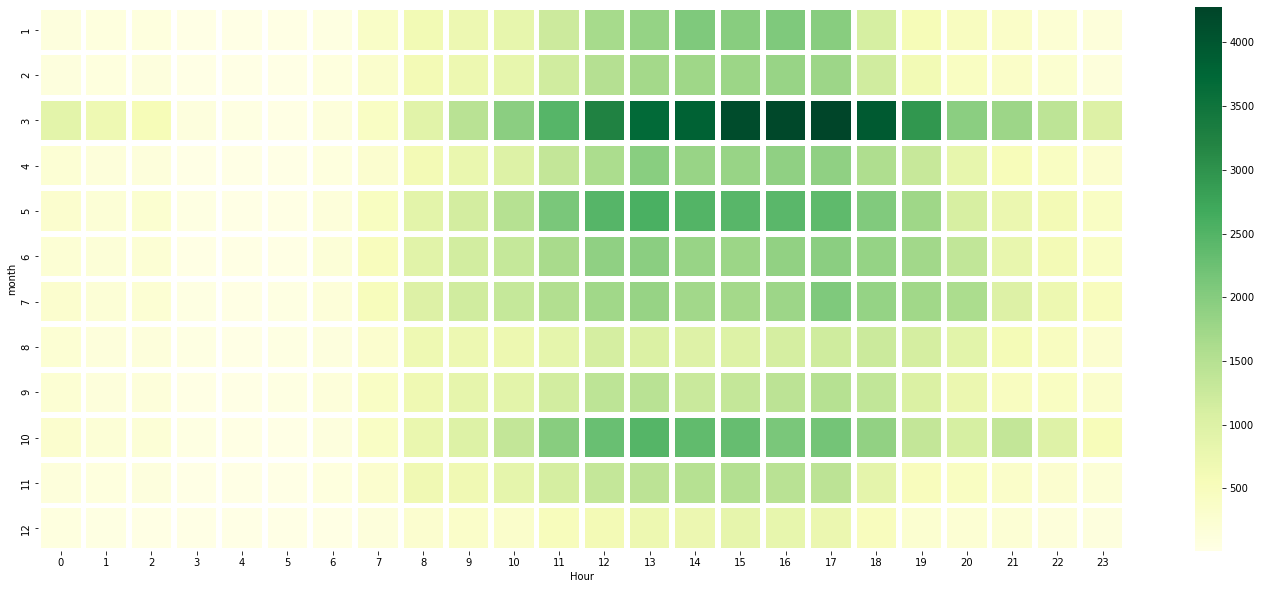

In [60]:
import seaborn as sns
plt.figure(figsize = (25,10))
sns.heatmap(pivoted_data, linewidths=5, cmap='YlGn',linecolor='white', square=True)

# Busy days of a month

In [57]:
df1["Day"] = df1["start_time"].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


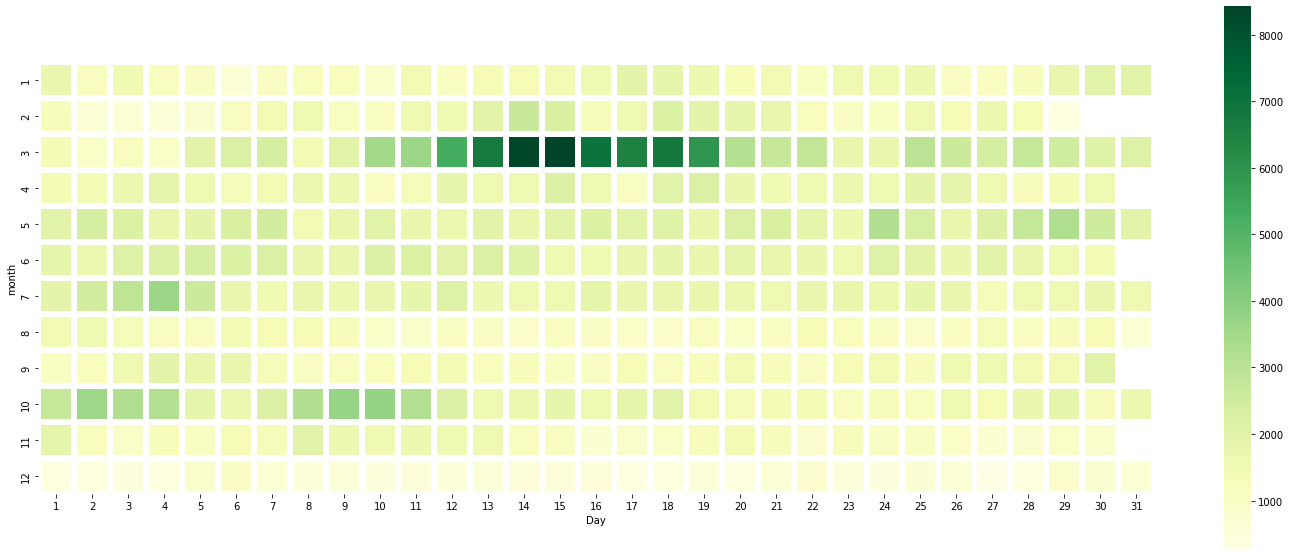

In [61]:
df_pivot3 = df1.groupby(["month","Day"])["trip_id"].count().to_frame()
pivoted_data3 = pd.pivot_table(df_pivot3, values='trip_id', index=['month'] , columns=['Day'], aggfunc=np.mean)
plt.figure(figsize = (25,10))
sns.heatmap(pivoted_data3, linewidths=5, cmap='YlGn',linecolor='white', square=True)

# Busy months of an year

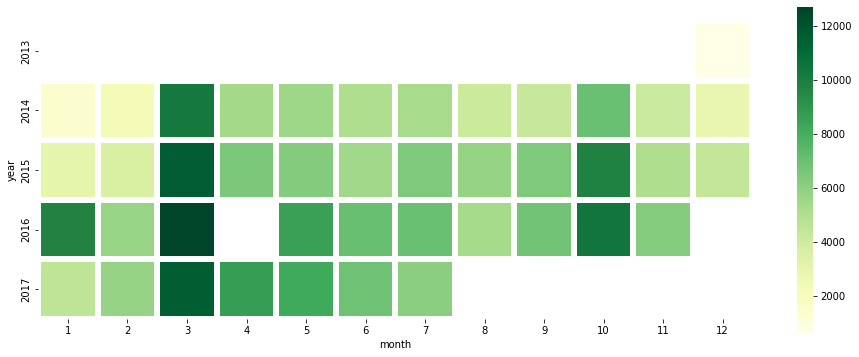

In [32]:
df_pivot2 = df1.groupby(["year","month"])["trip_id"].count().to_frame()
pivoted_data2 = pd.pivot_table(df_pivot2, values='trip_id', index=['year'] , columns=['month'], aggfunc=np.mean)
plt.figure(figsize = (16,6))
sns.heatmap(pivoted_data2, linewidths=5, cmap='YlGn',linecolor='white', square=True)